### TMM Homework 3 - Adam Poloček
Coutntry used in the task is Poland. 

,DATE,NGDPRSAXDCPLQ
,<fct>,<dbl>
1,1995-01-01,184732.2
2,1995-04-01,188071.8
3,1995-07-01,194767.9
4,1995-10-01,194480.2
5,1996-01-01,200233.1
6,1996-04-01,204627.2


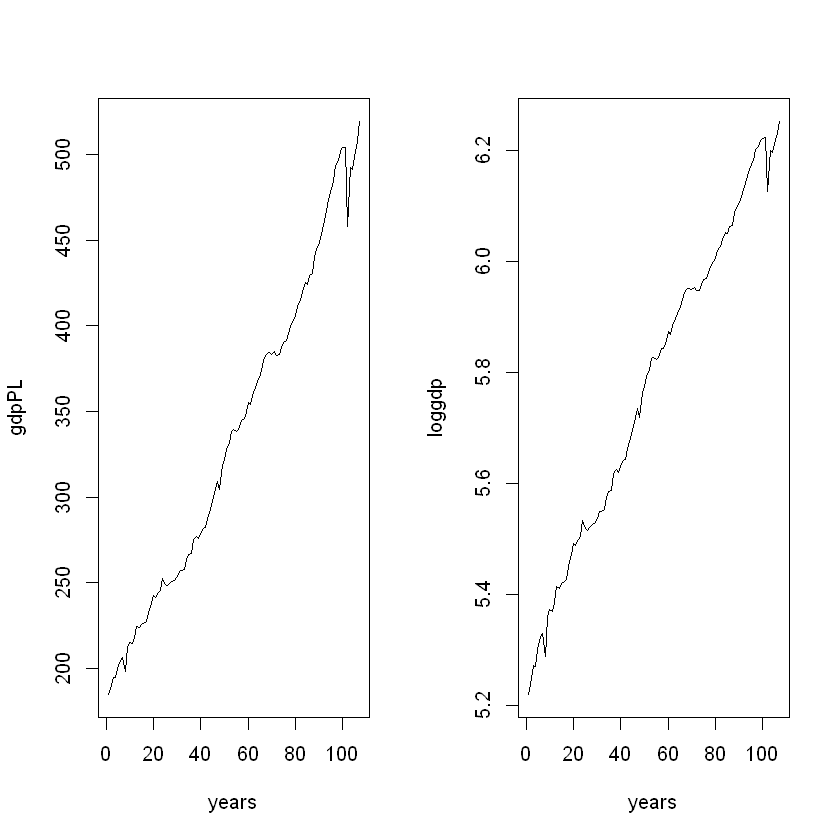

In [14]:
gdp <- read.csv("C:/Users/adamp/Downloads/NGDPRSAXDCPLQ.csv")
head(gdp)
gdpPL <- gdp[,2]*1e-3

par(mfrow=c(1,2))
plot(gdpPL, type = "l", xlab = "years")
loggdp<-log(gdpPL)
plot(loggdp, type = "l", xlab = "years")

We will use data for Poland in quaters for over 25 years

In [3]:
fftMy <- function(y,T,t,smoothFact){
  
  # periodogram    ... y in term of scales, x in term of periods
  # vs. spectogram ... commented lines 
  
  Ft <- abs(fft(y)/(T/2))
  #Ft <- abs(Ft)^2 # y axis scaled
  Ft <- Ft[1:ceiling(T/2)]
  
  #freqs <- t - 2*pi/T
  #freqs <- freqs[1:ceiling(T/2)] # x axis in angular, y axis unscaled
  freqs <- 0:(ceiling(T/2)-1) # x axis in periods, y axis scaled
  
  plot(freqs, Ft, type="h", xlab="Period", ylab=expression(f(x))) #, xlim=c(0, pi))
  points(freqs, Ft, pch=20)
  
  # smoothing -> spectrum
  # smoothFact = T/5 
  lines(smooth.spline(freqs,Ft, df=smoothFact), col="OrangeRed")
  
}

We use code directly from the seminar using also the smoothing parameter of 50

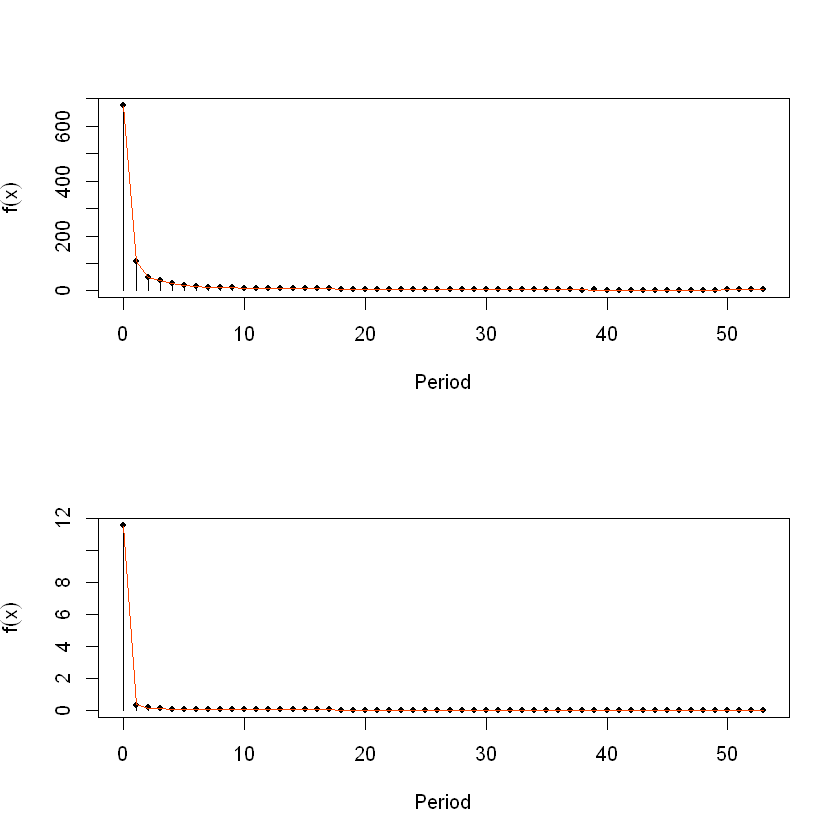

In [4]:
par(mfrow = c(2,1))
yy<-gdpPL
T <- length(yy)
t <- (1:T)*2*pi/T
fftMy(yy,T,t,50)
y<-loggdp
T <- length(yy)
t <- (1:T)*2*pi/T
fftMy(y,T,t,50)

WHat we see is just as expected, a very strong low frequency, which is essentially a continuous growth with very little variation. What may be more interesting then, are the higher frequencies. 

In [5]:
#install.packages("mFilter")
library(mFilter)

Warning message:
"package 'mFilter' was built under R version 3.6.3"

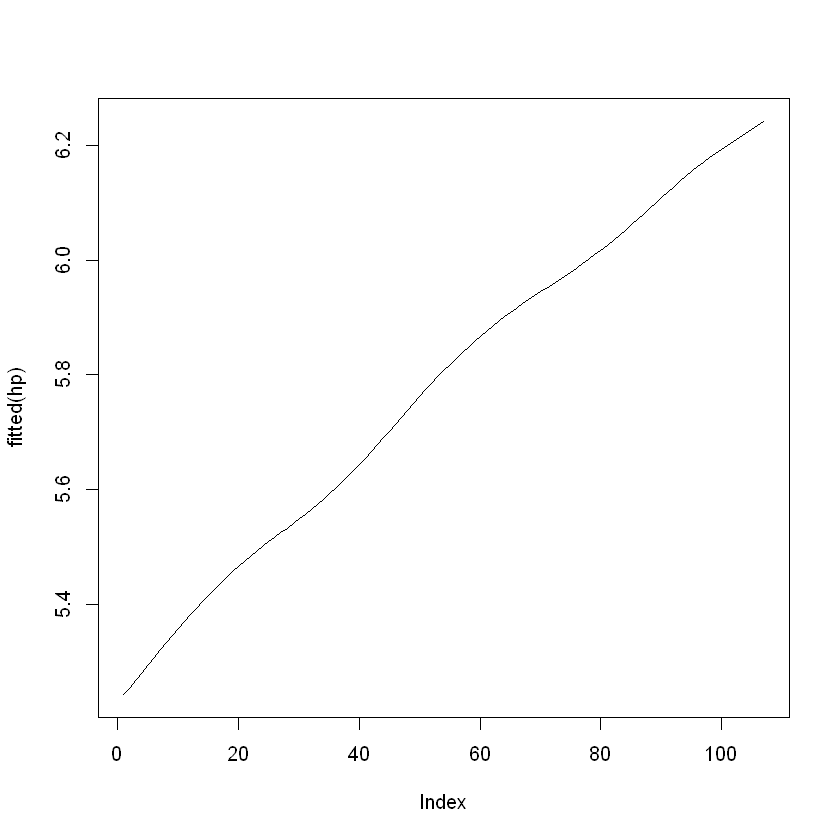

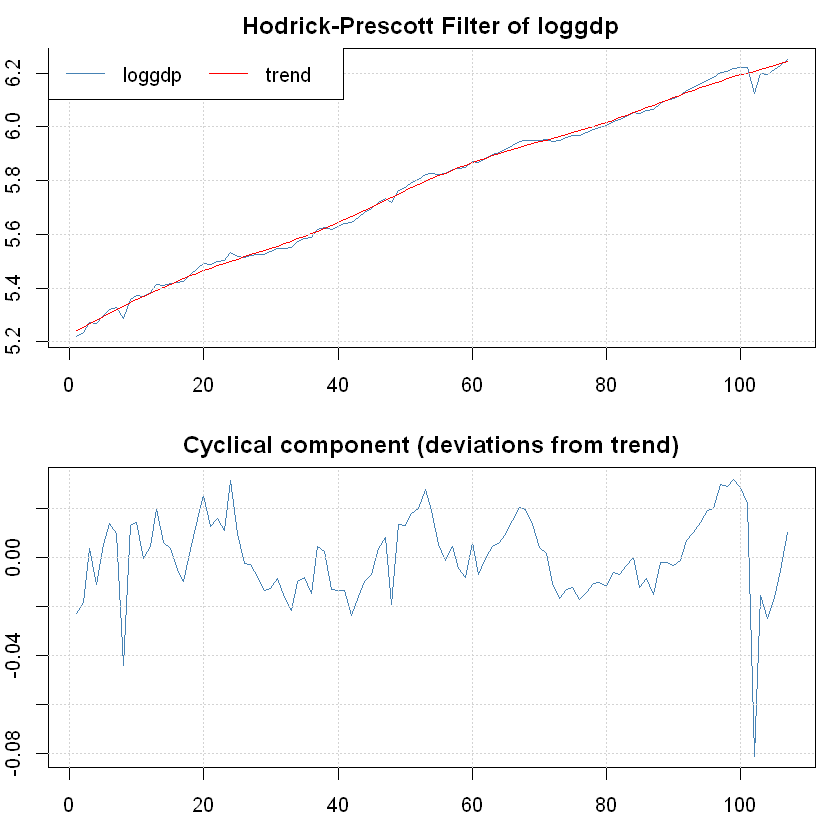

In [ ]:
hp <- hpfilter(loggdp,freq=1600,type="lambda")
# residuals(hpcz)
hpfit<-fitted(hp)
plot(fitted(hp), type = "l")
plot(hp)


Title:
 Baxter-King Filter 

Call:
 bkfilter(x = loggdp)

Method:
 bkfilter

Filter Type:
 fixed

Series:
 loggdp

Descriptive Statistics:
 
     loggdp          Trend           Cycle          
 Min.   :5.219   Min.   :5.279   Min.   :-0.065553  
 1st Qu.:5.526   1st Qu.:5.531   1st Qu.:-0.003326  
 Median :5.824   Median :5.822   Median : 0.000315  
 Mean   :5.779   Mean   :5.782   Mean   :-0.000019  
 3rd Qu.:6.013   3rd Qu.:5.999   3rd Qu.: 0.004453  
 Max.   :6.253   Max.   :6.209   Max.   : 0.025572  
                 NA's   :6       NA's   :6          

In-sample error measures:
        ME        MSE        MAE        MPE       MAPE 
-1.866e-05  1.071e-04  5.911e-03 -5.689e-06  1.032e-03 



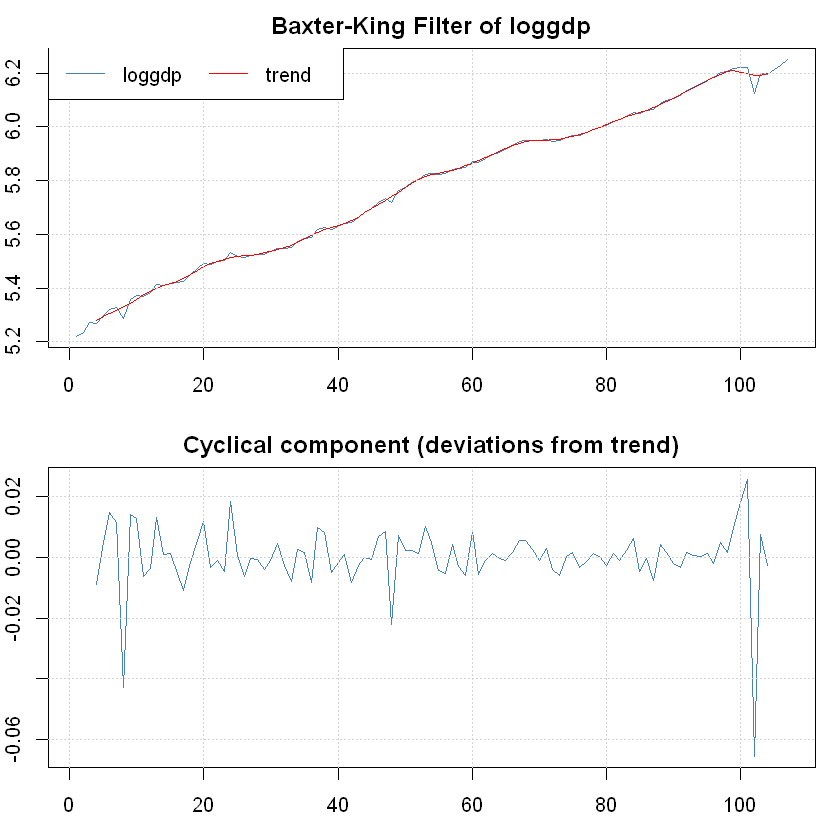

In [6]:
bk <- bkfilter(loggdp)
summary(bk)
plot(bk)

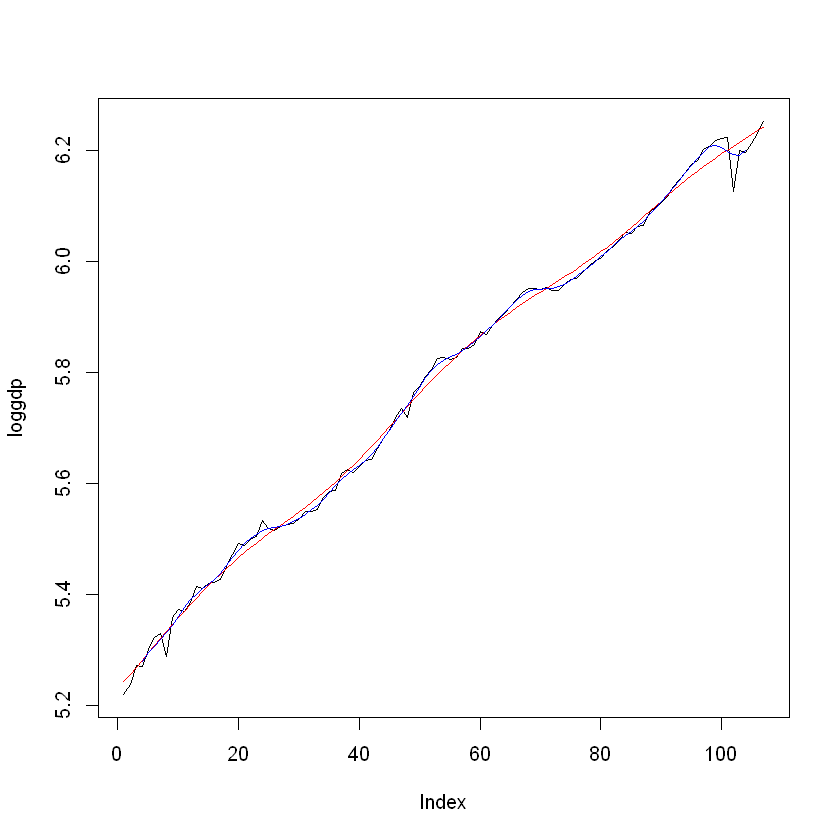

In [9]:
par(mfrow=c(1,1))
plot(loggdp, type="l")
lines(hp$trend, col="red")
lines(bk$trend, col="blue")

[1] 107

Warning message in yth_filter(loggdpxts, h = 8, p = 4):
"Your xts object doesn't have a dimnames attribute, aka names(your_xts) is NULL, which would've produced an error.
    Thus it has been given the name 'y' within the scope, and for the output, of this function."

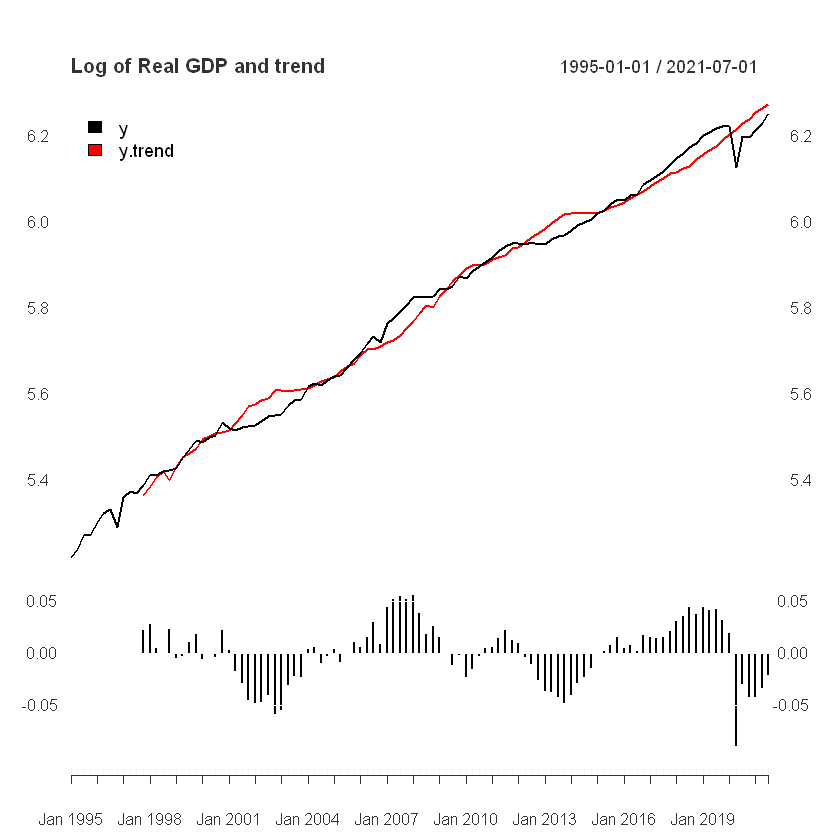

In [16]:
#install.packages("neverhpfilter")
#here we can reuse most of the code since our data begin in the same point as the original data
library(neverhpfilter)
library(xts)
length(loggdp)
dates <- seq(as.Date("1995-01-01"), length = 107, by = "quarters")
loggdpxts <- xts(loggdp, order.by=dates)

gdp_HAM <- yth_filter(loggdpxts, h= 8, p = 4)
par(mfrow=c(1,1))
plot(gdp_HAM["1995/"][,1:2], grid.col = "white", legend.loc = "topleft", main = "Log of Real GDP and trend", panels = 'lines(gdp_HAM["1995/"][,3], type="h", on=NA)')


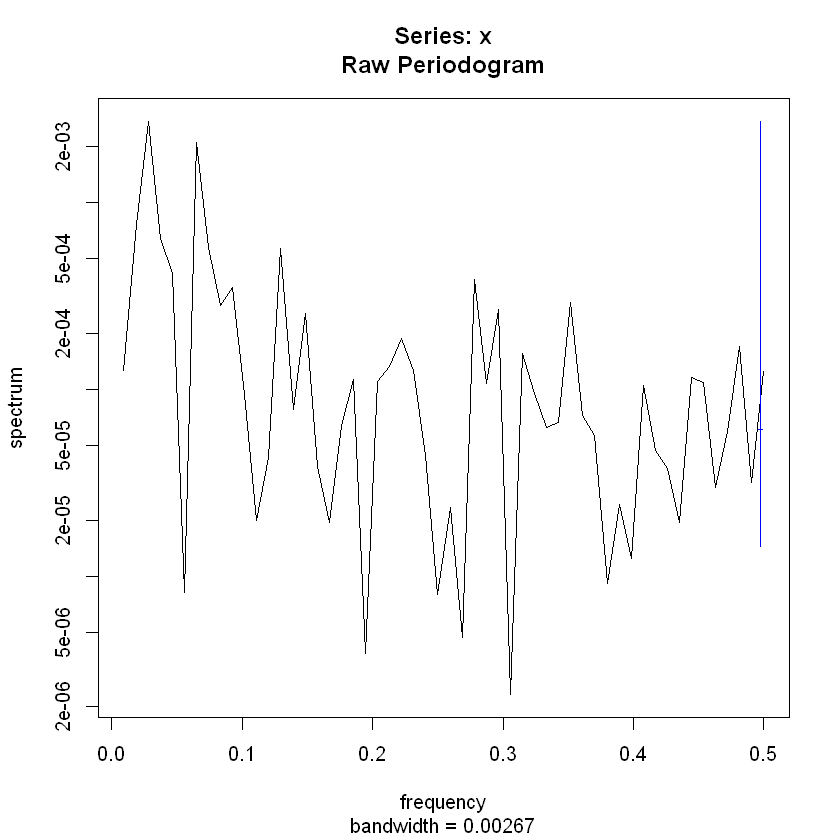

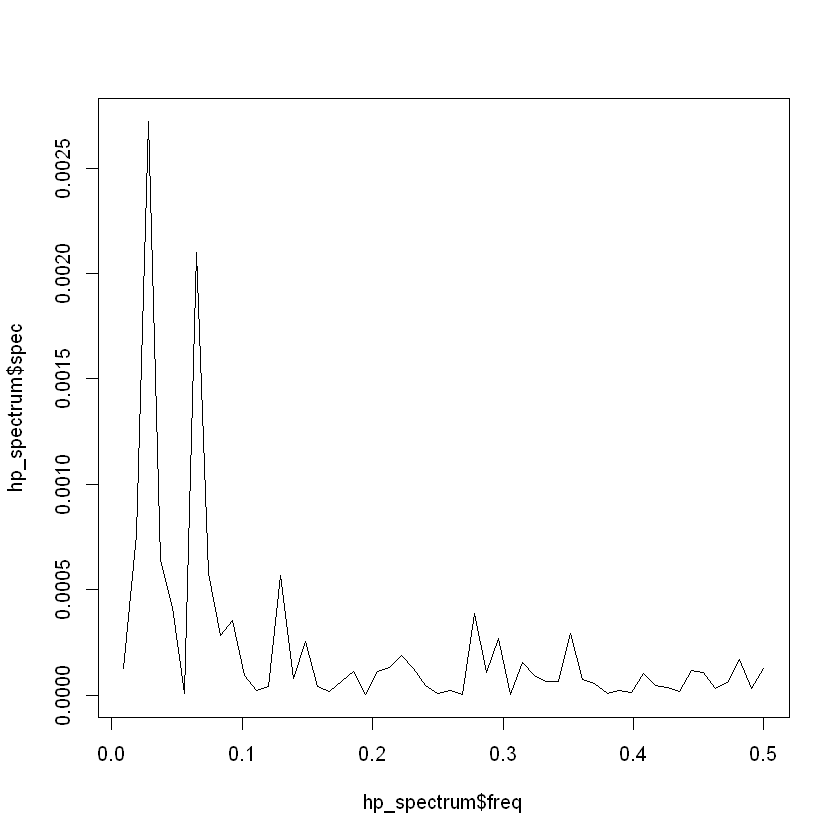

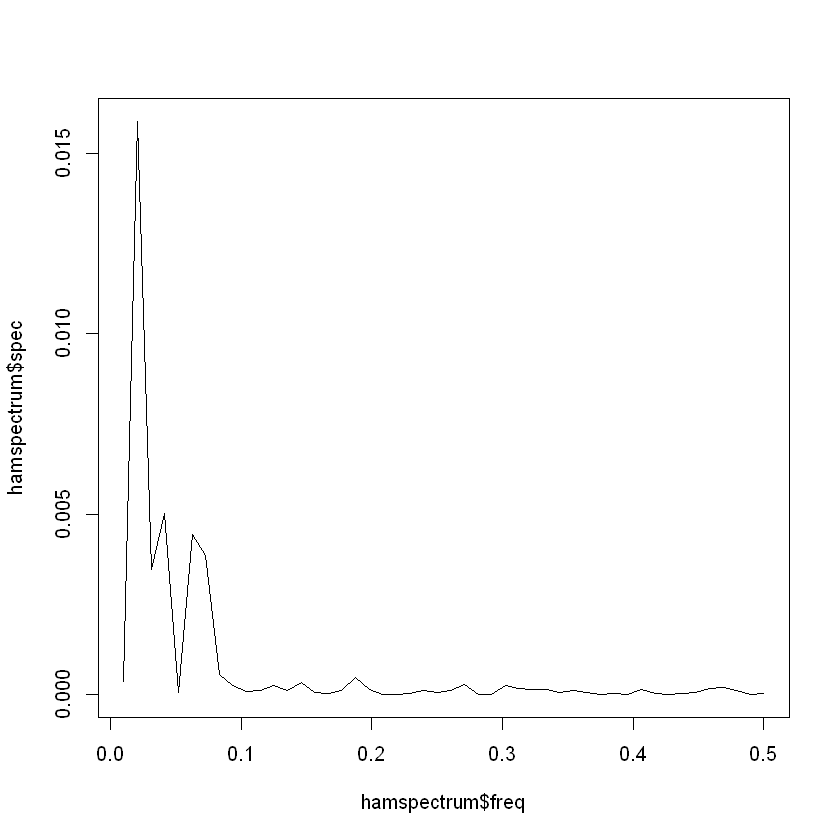

In [42]:
hp_spectrum <- spectrum(hp$cycle)
plot(hp_spectrum$freq, hp_spectrum$spec, type = "l")
plot(hamspectrum$freq, hamspectrum$spec, type = "l")




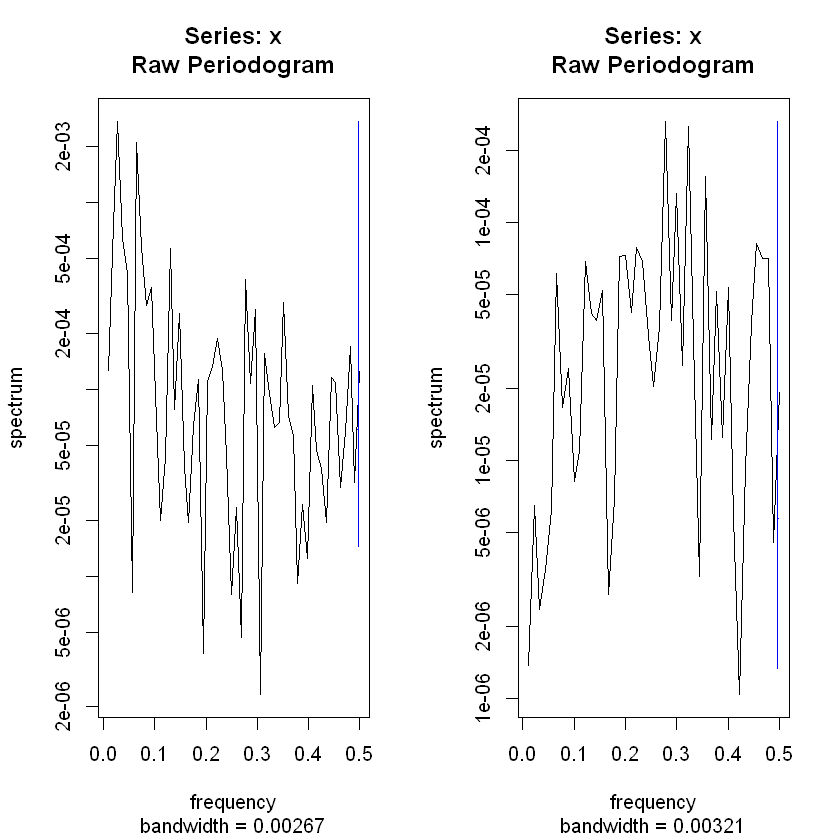

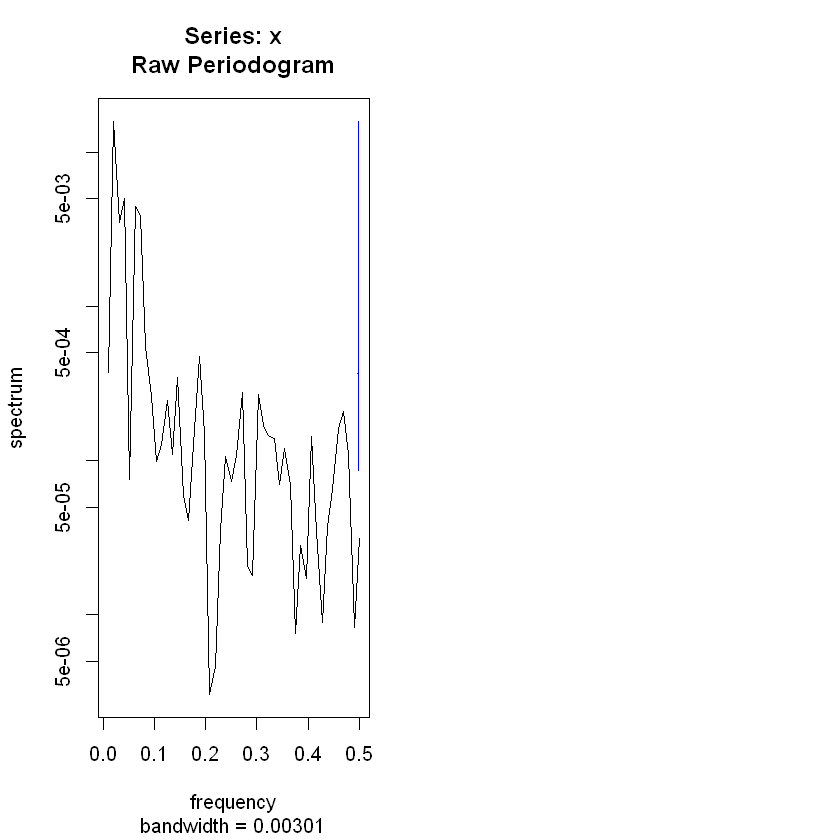

In [45]:
par(mfrow=c(1,2))
hp_spectrum <- spectrum(hp$cycle)
bk_spectrum <- spectrum(bk$cycle[4:91])
hamspectrum<-spectrum(gdp_HAM$y.cycle[12:length(gdp_HAM$y.cycle)])

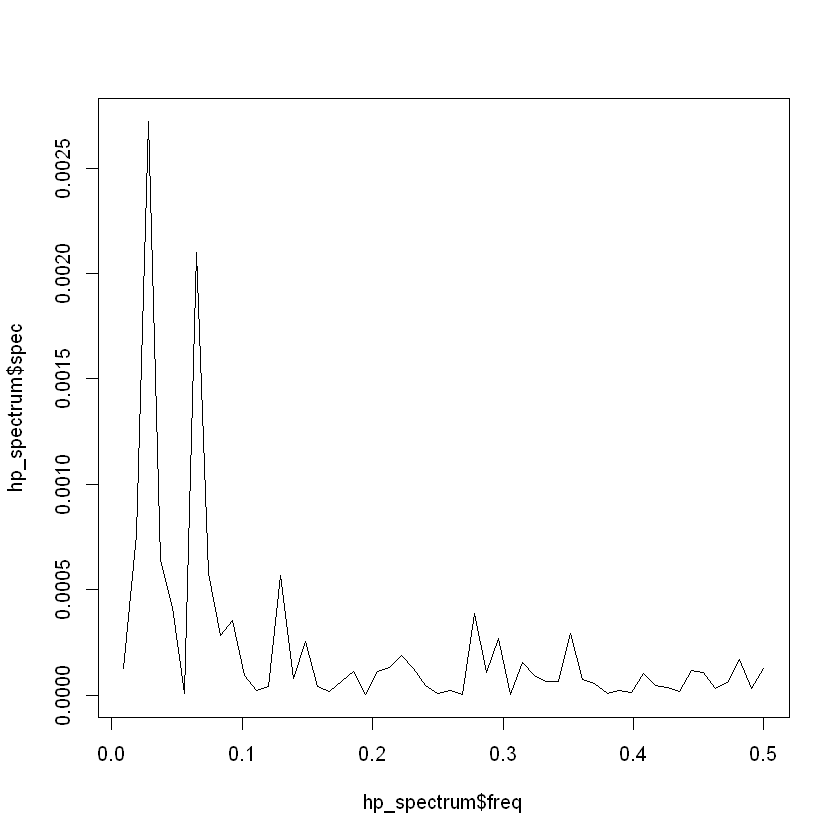

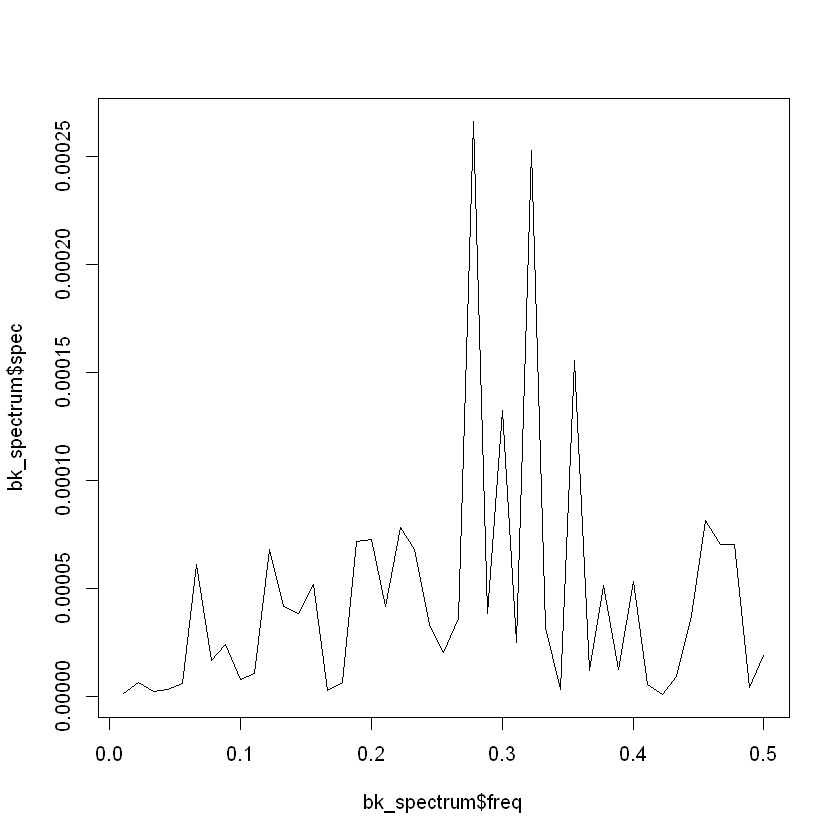

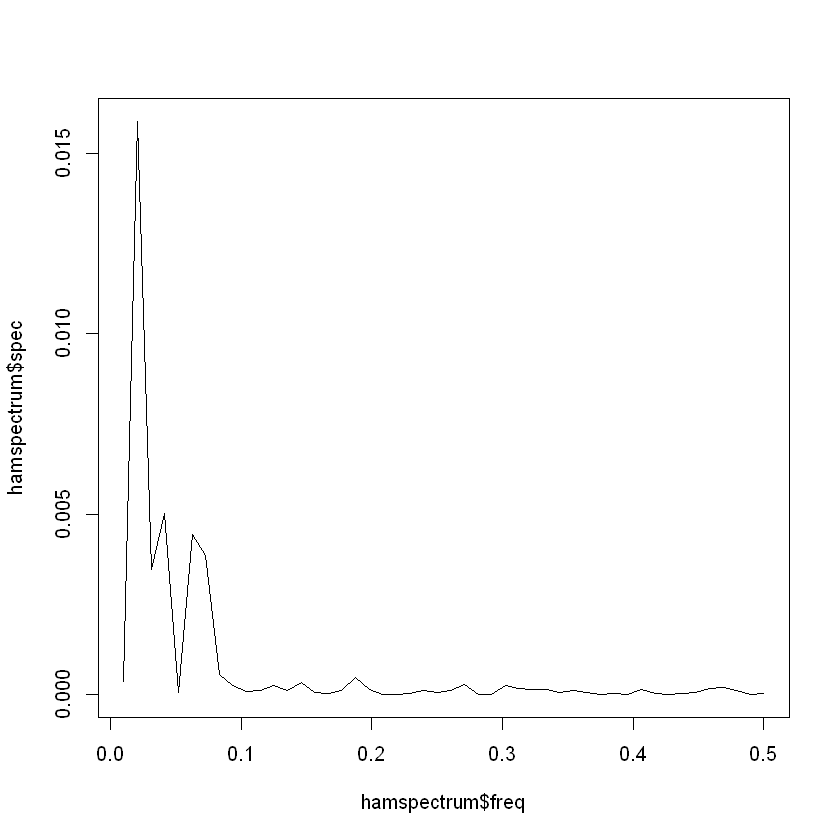

In [47]:





plot(hp_spectrum$freq, hp_spectrum$spec, type = "l")
plot(bk_spectrum$freq, bk_spectrum$spec, type = "l")
plot(hamspectrum$freq, hamspectrum$spec, type = "l")



In [ ]:
Above we can see spectra of three different cycles separated from the data on GDP of Poland for last about 30 years. As we can see, they differ quite significantly.